<h1>Assignment Convolution</h1>

## Write a code for convolution of two given DTSs without using inbuilt function.

Convolution output $y(n)$ is given by
    \begin{equation}
    y(n) = x(n) * h(n) = \sum \limits _{k=-\infty} ^{\infty} x(k) * h(n-k)
    \end{equation}

<h2>Import Modules</h2>

In [31]:
import numpy as np
import matplotlib.pyplot as plt

## Step - 1:
- Fold the signal h(n) i.e 
    $h(n) = h(-n)$
- And reorganize the corresponding array containing amplitude values
- Return Reorganized Array and Inverted timestamp

<h3>Helper function for plotting</h3>

In [32]:
def plot_graph(sequence, val_range, x_label = None, y_label = None, graph_title = None):
    """
    sequene: To plot
    val_range: Min-max range of the sequence
    x_label, y_label, graph_title: Labelling the plot
    """
    plt.stem(val_range, sequence, use_line_collection= True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(graph_title)
    plt.show()

<h3>Folding</h3>

In [33]:
def folding(arr, n):
    
    # sanity check for length of timestamp and signal array must be same
    assert len(arr) == len(n)
    index_0 = np.where(n == 0)[0][0]
    
    # initiate an empty array to store our updated array
    new_arr = []
    
    # push all the positive timestamps to our new arr
    # for example in our case
    # [-1, 0, 1, 2] will be [-2, -1, 0, 1] and corresponding array values will be updated accordingly
    
    # push from 2 to 1 in reverse order
    for i in range(len(n) - 1, index_0 - 1, -1):
        new_arr.append(arr[i])
    
    # push from 0 to -1 in the same order
    for j in arr[:index_0][::-1]:
        new_arr.append(j)
    
    # our n is now [2, 1, 0, -1] hence return the negative sorted values i.e [-2, -1, 0, 1] which is our folded timestamp
    return np.array(new_arr), sorted(-n)

<h3>Padding</h3>

In [34]:
def zero_pad(arr, left_pad=0, right_pad=0):
    
    # depending on the consequences, we may need left padding i.e adding zeros on the left
    # or right padding, i.e adding zeros on the right
    # hence we have takes both paddings in the same function
    # this function will return an array as such
    # [left_padded + original_arr + right_padded]
    
    padded_arr = np.append(np.zeros((left_pad, )),
                          np.append(arr, np.zeros(right_pad, )))
    
    return padded_arr

<h1> Calculating Convolution </h1>

<h3> Before moving ahead, I heartily request to read the comments what I have written, Its completely original and I am attacing the same idea in pen paper doc also.</h3>

<img src='MicrosoftTeams-image.png' width=250 height=250>

## Step - 2:
- In this step what I did is, passed our zero-padded signal of length $l1+l2-1$ and original $h(n)$ (without any padding)
- I took it as a kernel of shape $(7, )$ that will be passed through our zero-padded signal for every timestamp that would have non-zero value in our convolution output.
- Hence, I stacked those $(7, )$ shape vectors to have a matrix of shape $(7, 7)$ and initiated the values with $0$.
- Then I took the transpose to allign the values against our main signal $X$ and took the matrix multiplication.

In [35]:
def calculate_convolution(x, h):
    """
    parameters: 
    x -> zero padded signal of len = max_len i.e l1 + l2 - 1
    h -> our folded h(n) signal 
    """
    
    # initiate the matrix as said above
    ans = np.zeros((x.shape[0], x.shape[0]))
    
    # keep stacking the linear kernels which will be later passed on our padded signal
    for i in range(ans.shape[0]):
        if i < len(h):
            ans[i, :i + 1] = h[-i - 1:]
        else:
            ans[i, i - len(h)+1: i+1] = h
    # print to observe
    print('\nStack of linear kernels: \n\n', ans)
    
    # take the transpose
    ans = np.transpose(ans)
    
    # return matrix multiplication of our padded signal and our kernel matrix, this is our desired result
    return np.matmul(x, ans)

<h1>Final Implementaion taking various signals</h1>

- Refer to the comments mentioned

In [36]:
def main(x1, n1, x2, n2):
    # show signal x1
    print("Signal x is: ", x1)
    print("\nTime stamp of X is: ", n1)
    plot_graph(x1, n1, y_label='$x1$', x_label='timestamp', graph_title='Signal $x$')

    # show signal x2
    print("\nSignal H is: ", x2)
    print("\nTimestamp of H is: ", n2)
    plot_graph(x2, n2, y_label='$h(n)$', x_label='timestamp', graph_title='Signal $h$')


    # apply foldgin on second signal
    folded_H, neg_timestamp = folding(x2, n2)
    print("\nFolded H is: ", folded_H)
    print("\nTimestamp of H is: ", neg_timestamp)
    plot_graph(folded_H, neg_timestamp, x_label='timestamp', y_label='$h(-n)$', graph_title='Folded $h(n)$')

    # create the resutant timestamp
    # take the min of min of timestamps
    left_most_timestamp = min(min(n1), min(neg_timestamp))

    # calculate the maximum sequence length
    max_len_result = len(n1) + len(neg_timestamp) - 1

    # initialize the resultant convolution array with zeroes
    result_time_stamp = np.arange(left_most_timestamp, left_most_timestamp + max_len_result, 1)
    print("\nResultant timestamp would be: ", result_time_stamp)

    # pad our Signal X upto the len of max_len
    # 3 is obtained from result_time_stamp - len(x1)
    X = zero_pad(x1, right_pad=3)

    # Here is our result
    result = calculate_convolution(X, folded_H)
    print('\nConvolution of Signal x1 and x2 is: ', result)

    plot_graph(result, result_time_stamp, x_label='timestamp', y_label='$\sum x(k) * h(n-k)$', graph_title='Convoution Result')

    assert all(np.convolve(x1, x2) == result), 'Computed Result is Wrong'

Signal x is:  [1 2 3 4]

Time stamp of X is:  [-1  0  1  2]


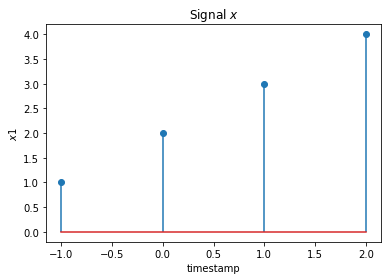


Signal H is:  [1 2 1 1]

Timestamp of H is:  [-2 -1  0  1]


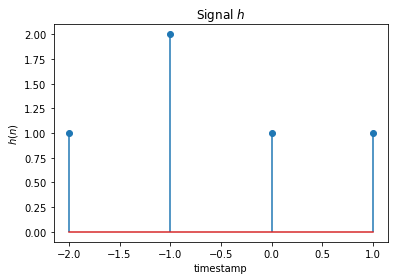


Folded H is:  [1 1 2 1]

Timestamp of H is:  [-1, 0, 1, 2]


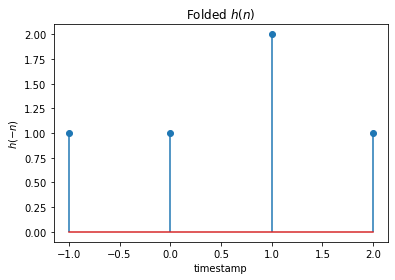


Resultant timestamp would be:  [-1  0  1  2  3  4  5]

Stack of linear kernels: 

 [[1. 0. 0. 0. 0. 0. 0.]
 [2. 1. 0. 0. 0. 0. 0.]
 [1. 2. 1. 0. 0. 0. 0.]
 [1. 1. 2. 1. 0. 0. 0.]
 [0. 1. 1. 2. 1. 0. 0.]
 [0. 0. 1. 1. 2. 1. 0.]
 [0. 0. 0. 1. 1. 2. 1.]]

Convolution of Signal x1 and x2 is:  [ 1.  4.  8. 13. 13.  7.  4.]


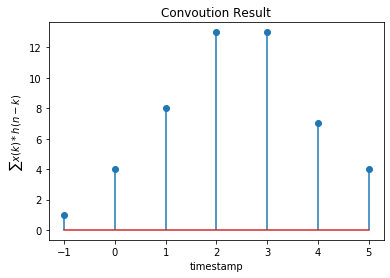

In [37]:
############################
# input signal 1
x1 = np.array([1, 2, 3, 4])
n1 = np.arange(-1, 3, 1)

############################
# input signal 2
x2 = np.array([1, 2, 1, 1])
n2 = np.arange(-2, 2, 1)


############################
# call the main function which contains all the implementation
main(x1, n1, x2, n2)

<h2> Addition Questions</h2>

- A mention: I have used assert which makes sure that my derived result is exactly same as the result using inbuilt function.

<h3>2) X(n_1 )={1 2 3 4},  n_1=0:3; h(n_2 )={1 2 1 1 } ,  n_2=-3:0</h3>

Signal x is:  [1 2 3 4]

Time stamp of X is:  [0 1 2 3]


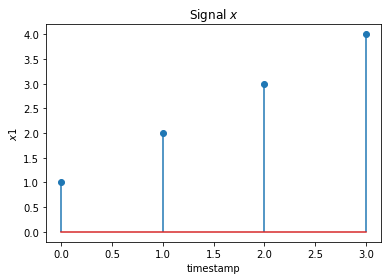


Signal H is:  [1 2 1 1]

Timestamp of H is:  [-3 -2 -1  0]


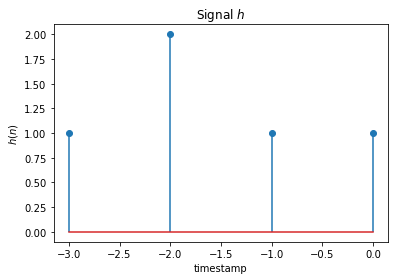


Folded H is:  [1 1 2 1]

Timestamp of H is:  [0, 1, 2, 3]


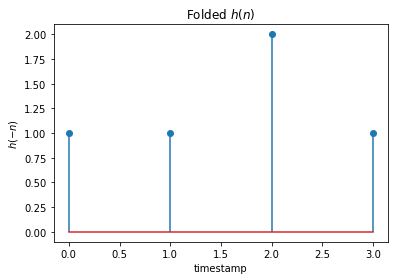


Resultant timestamp would be:  [0 1 2 3 4 5 6]

Stack of linear kernels: 

 [[1. 0. 0. 0. 0. 0. 0.]
 [2. 1. 0. 0. 0. 0. 0.]
 [1. 2. 1. 0. 0. 0. 0.]
 [1. 1. 2. 1. 0. 0. 0.]
 [0. 1. 1. 2. 1. 0. 0.]
 [0. 0. 1. 1. 2. 1. 0.]
 [0. 0. 0. 1. 1. 2. 1.]]

Convolution of Signal x1 and x2 is:  [ 1.  4.  8. 13. 13.  7.  4.]


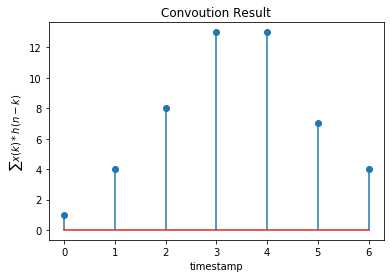

In [38]:
############################
# input signal 1
x1 = np.array([1, 2, 3, 4])
n1 = np.arange(0, 4, 1)

############################
# input signal 2
x2 = np.array([1, 2, 1, 1])
n2 = np.arange(-3, 1, 1)


############################
# call the main function which contains all the implementation
main(x1, n1, x2, n2)

<h3>3) X(n_1 )={1 2 3 4},  n_1=-3:0; h(n_2 )={1 2 1 1 } , n_2=0:3</h3>

Signal x is:  [1 2 3 4]

Time stamp of X is:  [-3 -2 -1  0]


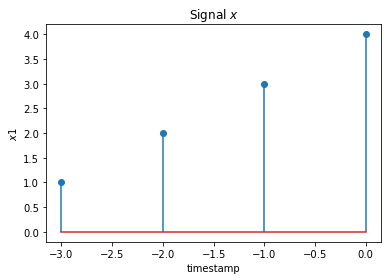


Signal H is:  [1 2 1 1]

Timestamp of H is:  [0 1 2 3]


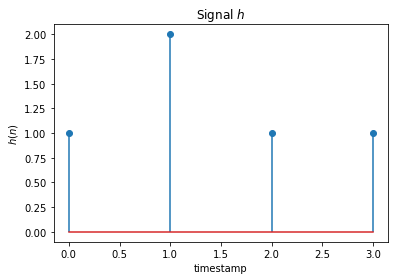


Folded H is:  [1 1 2 1]

Timestamp of H is:  [-3, -2, -1, 0]


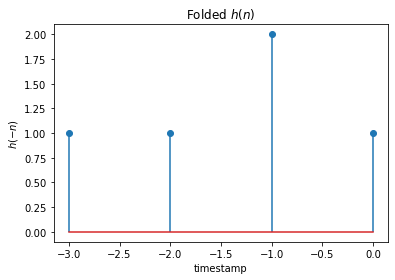


Resultant timestamp would be:  [-3 -2 -1  0  1  2  3]

Stack of linear kernels: 

 [[1. 0. 0. 0. 0. 0. 0.]
 [2. 1. 0. 0. 0. 0. 0.]
 [1. 2. 1. 0. 0. 0. 0.]
 [1. 1. 2. 1. 0. 0. 0.]
 [0. 1. 1. 2. 1. 0. 0.]
 [0. 0. 1. 1. 2. 1. 0.]
 [0. 0. 0. 1. 1. 2. 1.]]

Convolution of Signal x1 and x2 is:  [ 1.  4.  8. 13. 13.  7.  4.]


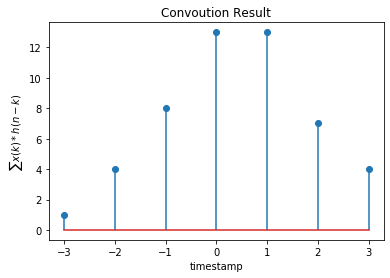

In [39]:
############################
# input signal 1
x1 = np.array([1, 2, 3, 4])
n1 = np.arange(-3, 1, 1)

############################
# input signal 2
x2 = np.array([1, 2, 1, 1])
n2 = np.arange(0, 4, 1)


############################
# call the main function which contains all the implementation
main(x1, n1, x2, n2)

<h3>4) X(n_1 )={-4 -3 -2 -1 1 2 3 4},  n_1=-3:4; h(n_2 )={1 2 1 1 } ,   n_2=0:3</h3>

Signal x is:  [-4 -3 -2 -1  1  2  3  4]

Time stamp of X is:  [-3 -2 -1  0  1  2  3  4]


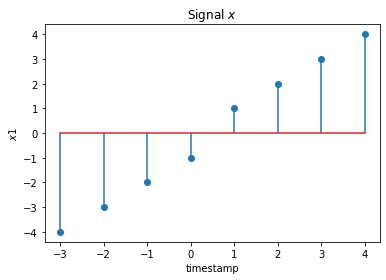


Signal H is:  [1 2 1 1]

Timestamp of H is:  [0 1 2 3]


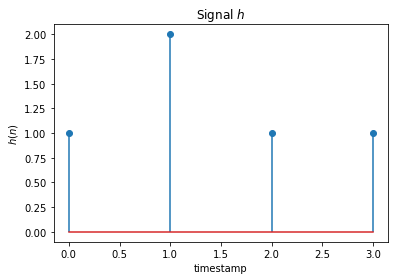


Folded H is:  [1 1 2 1]

Timestamp of H is:  [-3, -2, -1, 0]


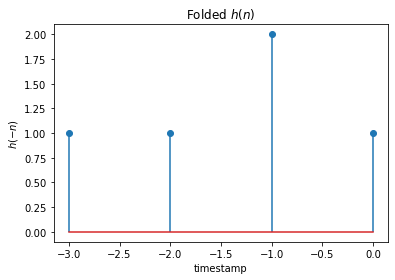


Resultant timestamp would be:  [-3 -2 -1  0  1  2  3  4  5  6  7]

Stack of linear kernels: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 2. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 2. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 2. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 2. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 1.]]

Convolution of Signal x1 and x2 is:  [ -4. -11. -12. -12.  -6.   1.   7.  13.  13.   7.   4.]


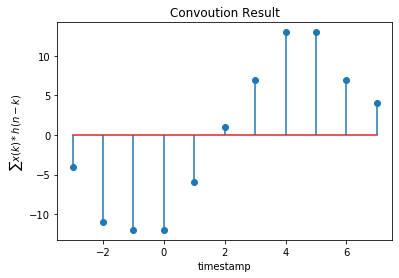

In [40]:
############################
# input signal 1
x1 = np.array([-4, -3, -2, -1, 1, 2, 3, 4])
n1 = np.arange(-3, 5, 1)

############################
# input signal 2
x2 = np.array([1, 2, 1, 1])
n2 = np.arange(0, 4, 1)


############################
# call the main function which contains all the implementation
main(x1, n1, x2, n2)

<h4> Yes, my algorithm works for all the given cases as it passed the assert condition I used in the last line of the main function. Thank You.</h4>